In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [108]:
## uni = file name
uni = "test"

path = "/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [109]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

sju_test_32f_4h_200n_5l
test
test_all_data_128f_200pmt_7la
test_memory


In [110]:
# train_list = ['/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/20240117_500_1000pmt_sakerv3/train.csv',
#  '/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/20240117_500_200pmt_sakerv3/train.csv',
#  '/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/20240117_500_200pmt_sakerv3_deep/train.csv',

#  '/home/chyoo/work/KNO_VRDL/result/20231013_KNO_sort200_SAVR2_posembedding_pos/train.csv',
# ]

0 391  /  MTL = 83.6010285  /  MTL epoch = 0345  /  84.1243515  /  MVL = 84.1243515  /  MVL epoch = 0346  /  test
1 105  /  MTL = 155.1194602  /  MTL epoch = 0101  /  148.3191239  /  MVL = 148.3191239  /  MVL epoch = 0101  /  test_memory
2 27  /  MTL = 93.3956809  /  MTL epoch = 0026  /  83.1944273  /  MVL = 83.1944273  /  MVL epoch = 0026  /  test_all_data_128f_200pmt_7la
3 5  /  MTL = 241.6104929  /  MTL epoch = 0004  /  227.9997882  /  MVL = 227.9997882  /  MVL epoch = 0004  /  sju_test_32f_4h_200n_5l


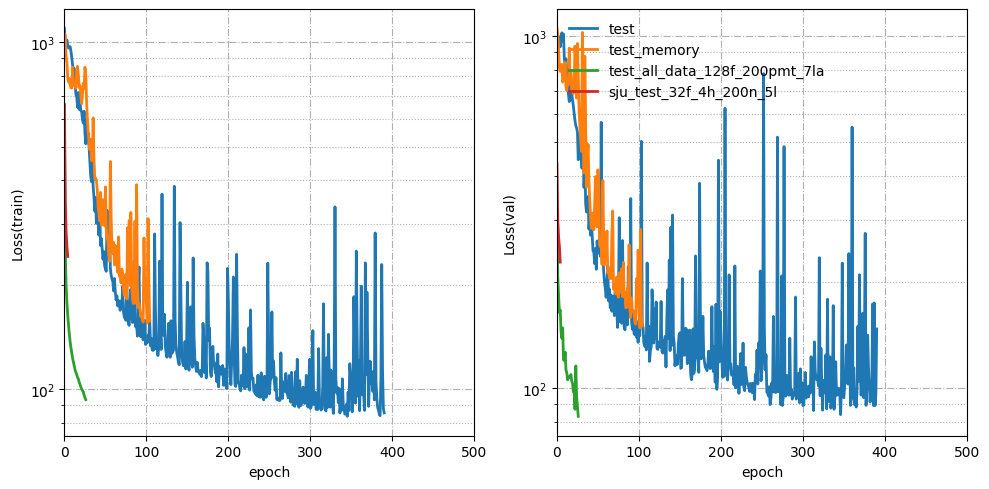

In [111]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(1, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(1, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')

for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,500])

lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])

    label = train_list[i]
    l =  ax1.plot(df['loss'], linewidth=2) 
    ax2.plot(df['val_loss'], linewidth=2,label=label.split('/')[-2])
   
    print(i,
          len(df['loss']),
          ' / ',
          "MTL = " + f"{df['loss'].min():.7f}",
          " / ",
          "MTL epoch = " + str("{:04}".format(np.where(df['loss']==df['loss'].min())[0][0])),
          " / ",
          f"{df['val_loss'].min():.7f}",
          " / ",
          "MVL = " + f"{df['val_loss'].min():.7f}",
          " / ",
          "MVL epoch = " + str("{:04}".format(np.where(df['val_loss']==df['val_loss'].min())[0][0])),
          " / ",
          label.split('/')[-2])

    lines.append(l[0])
    labels.append(label)
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.legend()
plt.show()
plt.close()

In [112]:
!pwd

/home/chyoo/work/KNO_reconstruction/KNO_vertex
